In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Historic Index Data.csv", index_col = 'Date') #load data making date the index
data.index = pd.to_datetime(data.index, format = '%d/%m/%Y') # convert the date to datetime type
data = data.drop("S.N.", axis = 1) # drop the S.N. column
data = data.iloc[::-1] # reverse the data to go from past to future dates

In [3]:
data = data[data["Turnover"] != '0'] # Remove rows where turnover == 0
data.head()

,Open,High,Low,Close,Change,Per Change (%),Turnover
Date,,,,,,,
2016-05-29,"1,522.25","1,522.25","1,522.25","1,522.25",-2.84,-0.19,"1,152,870,016.00"
2016-05-30,"1,526.96","1,526.96","1,526.96","1,526.96",4.71,0.31,"1,148,169,984.00"
2016-05-31,"1,532.12","1,532.12","1,532.12","1,532.12",5.16,0.34,"1,298,520,064.00"
2016-06-01,"1,523.56","1,523.56","1,523.56","1,523.56",-8.56,-0.56,"1,196,009,984.00"
2016-06-02,"1,518.12","1,518.12","1,518.12","1,518.12",-5.44,-0.36,"1,009,539,968.00"


In [4]:
# convert to numerica value
data = data[["Open", "High", "Low", "Close", "Turnover"]]
data = data.replace({',': ''}, regex=True).astype(float)
data.head()

,Open,High,Low,Close,Turnover
Date,,,,,
2016-05-29,1522.25,1522.25,1522.25,1522.25,1.152870e+09
2016-05-30,1526.96,1526.96,1526.96,1526.96,1.148170e+09
2016-05-31,1532.12,1532.12,1532.12,1532.12,1.298520e+09
2016-06-01,1523.56,1523.56,1523.56,1523.56,1.196010e+09
2016-06-02,1518.12,1518.12,1518.12,1518.12,1.009540e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1833 entries, 2016-05-29 to 2024-05-16
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      1833 non-null   float64
 1   High      1833 non-null   float64
 2   Low       1833 non-null   float64
 3   Close     1833 non-null   float64
 4   Turnover  1833 non-null   float64
dtypes: float64(5)
memory usage: 85.9 KB


## Create Technical Indicators

In [6]:
def calculate_atr(data, window): # Average True Rate
    data['Previous Close'] = data['Close'].shift(1)
    data['TR'] = data[['High', 'Low', 'Previous Close']].apply(lambda x: max(x['High'] - x['Low'], abs(x['High'] - x['Previous Close']), abs(x['Previous Close'] - x['Low'])), axis=1)
    atr = data['TR'].rolling(window=window).mean()
    data.drop(['Previous Close', 'TR'], axis=1, inplace=True)  # Clean up intermediate columns
    return atr

In [7]:
# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [8]:
# Calculate Moving Average (MA)
def calculate_ma(data, window):
    return data['Close'].rolling(window=window).mean()

In [9]:
# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, span):
    return data['Close'].ewm(span=span, adjust=False).mean() 

In [10]:
# Calculate MACD
def calculate_macd(data, short_window, long_window):
    short_ema = calculate_ema(data, short_window)
    long_ema = calculate_ema(data, long_window)
    macd = long_ema - short_ema 
    return macd

In [11]:
# Define windows for calculations
rsi_window = 14
ma_window = 14
atr_window = 14
short_ema_window = 12
long_ema_window = 26
mfi_window = 14

In [12]:
# Add calculated indicators to the DataFrame
data['RSI'] = calculate_rsi(data, rsi_window)
data['MA'] = calculate_ma(data, ma_window)
data['12-day EMA'] = calculate_ema(data, short_ema_window)
data['26-day EMA'] = calculate_ema(data, long_ema_window)
data['MACD'] = calculate_macd(data, short_ema_window, long_ema_window)
data['ATR'] = calculate_atr(data,atr_window)
data.head(20)

,Open,High,Low,Close,Turnover,RSI,MA,12-day EMA,26-day EMA,MACD,ATR
Date,,,,,,,,,,,
2016-05-29,1522.25,1522.25,1522.25,1522.25,1.152870e+09,NaN,NaN,1522.250000,1522.250000,0.000000,NaN
2016-05-30,1526.96,1526.96,1526.96,1526.96,1.148170e+09,NaN,NaN,1522.974615,1522.598889,-0.375726,NaN
2016-05-31,1532.12,1532.12,1532.12,1532.12,1.298520e+09,NaN,NaN,1524.381598,1523.304156,-1.077441,NaN
2016-06-01,1523.56,1523.56,1523.56,1523.56,1.196010e+09,NaN,NaN,1524.255198,1523.323108,-0.932090,NaN
2016-06-02,1518.12,1518.12,1518.12,1518.12,1.009540e+09,NaN,NaN,1523.311321,1522.937692,-0.373629,NaN
2016-06-05,1483.14,1483.14,1483.14,1483.14,1.246660e+09,NaN,NaN,1517.131118,1519.989715,2.858597,NaN
2016-06-06,1483.21,1516.80,1483.21,1516.80,1.078500e+09,NaN,NaN,1517.080177,1519.753440,2.673263,NaN
2016-06-07,1516.80,1537.98,1516.80,1531.49,1.123600e+09,NaN,NaN,1519.297073,1520.622815,1.325742,NaN
2016-06-08,1531.49,1547.65,1529.24,1546.80,1.269300e+09,NaN,NaN,1523.528292,1522.561866,-0.966427,NaN


## Load the MacroEconomic Data

In [13]:
macro_economics  = pd.read_csv("./Macro_Economic.csv", index_col = 'Date')
macro_economics.index = pd.to_datetime(macro_economics.index, format = '%Y-%m').to_period('M')
macro_economics.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 108 entries, 2015-07 to 2024-06
Freq: M
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Inflation Rate(%)        106 non-null    float64
 1   Remittance (in Billons)  94 non-null     float64
 2   Treasury Bill            96 non-null     float64
 3   Commercial Bank rates    96 non-null     float64
 4   CPI                      100 non-null    float64
 5   Exchange Rate            102 non-null    float64
dtypes: float64(6)
memory usage: 5.9 KB


In [14]:
macro_economics["Year"] = macro_economics.index.year
macro_economics["Month"] = macro_economics.index.month
macro_economics.head()

,Inflation Rate(%),Remittance (in Billons),Treasury Bill,Commercial Bank rates,CPI,Exchange Rate,Year,Month
Date,,,,,,,,
2015-07,6.9,NaN,NaN,NaN,NaN,NaN,2015,7
2015-08,7.2,NaN,NaN,NaN,NaN,NaN,2015,8
2015-09,8.2,NaN,NaN,NaN,NaN,NaN,2015,9
2015-10,10.4,NaN,NaN,NaN,NaN,NaN,2015,10
2015-11,11.6,NaN,NaN,NaN,NaN,NaN,2015,11


In [15]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data.head()

,Open,High,Low,Close,Turnover,RSI,MA,12-day EMA,26-day EMA,MACD,ATR,Year,Month
Date,,,,,,,,,,,,,
2016-05-29,1522.25,1522.25,1522.25,1522.25,1.152870e+09,NaN,NaN,1522.250000,1522.250000,0.000000,NaN,2016,5
2016-05-30,1526.96,1526.96,1526.96,1526.96,1.148170e+09,NaN,NaN,1522.974615,1522.598889,-0.375726,NaN,2016,5
2016-05-31,1532.12,1532.12,1532.12,1532.12,1.298520e+09,NaN,NaN,1524.381598,1523.304156,-1.077441,NaN,2016,5
2016-06-01,1523.56,1523.56,1523.56,1523.56,1.196010e+09,NaN,NaN,1524.255198,1523.323108,-0.932090,NaN,2016,6
2016-06-02,1518.12,1518.12,1518.12,1518.12,1.009540e+09,NaN,NaN,1523.311321,1522.937692,-0.373629,NaN,2016,6


In [16]:
merged_data = pd.merge(data, macro_economics, on = ['Year', 'Month'], how = 'left')
merged_data.index = data.index

In [17]:
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1833 entries, 2016-05-29 to 2024-05-16
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     1833 non-null   float64
 1   High                     1833 non-null   float64
 2   Low                      1833 non-null   float64
 3   Close                    1833 non-null   float64
 4   Turnover                 1833 non-null   float64
 5   RSI                      1820 non-null   float64
 6   MA                       1820 non-null   float64
 7   12-day EMA               1833 non-null   float64
 8   26-day EMA               1833 non-null   float64
 9   MACD                     1833 non-null   float64
 10  ATR                      1820 non-null   float64
 11  Year                     1833 non-null   int32  
 12  Month                    1833 non-null   int32  
 13  Inflation Rate(%)        1822 non-null   float64
 14  Remitt

### Add temporal indicators

<Figure size 640x480 with 0 Axes>

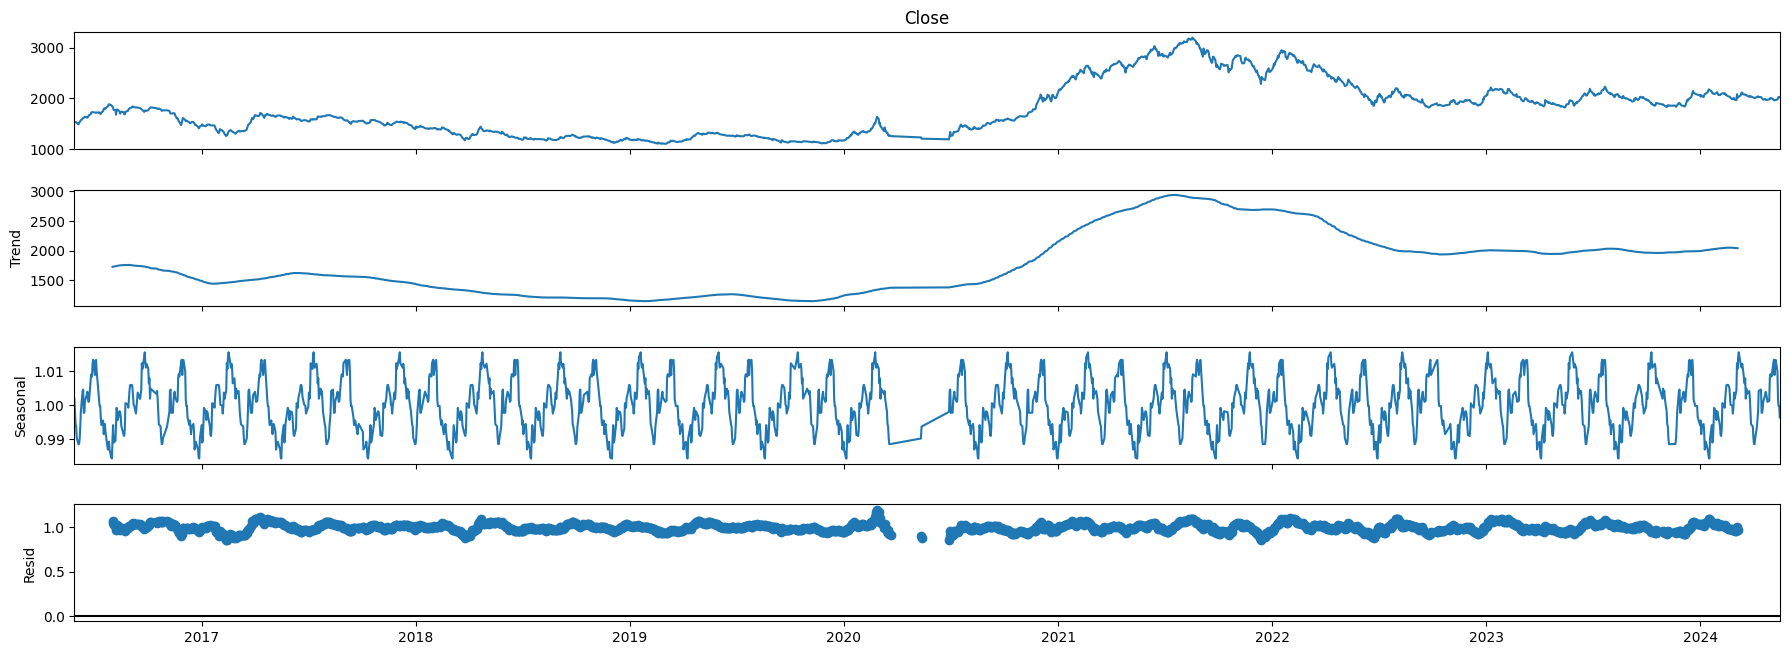

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='multiplicative',period = 90)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(20,7)
plt.show()

In [19]:
merged_data['Trend'] = decomposition.trend
merged_data['Seasonality'] = decomposition.seasonal
merged_data['Residue'] = decomposition.resid

## Create target variable 

In [20]:
merged_data['Target'] = merged_data['Close'].shift(-1)
merged_data_1 = merged_data.dropna().copy()
merged_data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2016-08-02 to 2024-03-05
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     1743 non-null   float64
 1   High                     1743 non-null   float64
 2   Low                      1743 non-null   float64
 3   Close                    1743 non-null   float64
 4   Turnover                 1743 non-null   float64
 5   RSI                      1743 non-null   float64
 6   MA                       1743 non-null   float64
 7   12-day EMA               1743 non-null   float64
 8   26-day EMA               1743 non-null   float64
 9   MACD                     1743 non-null   float64
 10  ATR                      1743 non-null   float64
 11  Year                     1743 non-null   int32  
 12  Month                    1743 non-null   int32  
 13  Inflation Rate(%)        1743 non-null   float64
 14  Remitt

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LinearRegression()

In [23]:
predictors = ['Open', 'High', 'Low', 'Turnover', 'RSI', 'MA', 
              'MACD', 'ATR', 'Inflation Rate(%)', 'Remittance (in Billons)', 'Treasury Bill',
              'Commercial Bank rates', 'CPI', 'Exchange Rate','Close', 'Trend', 'Seasonality']

In [24]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()
merged_data_scaled = feature_scaler.fit_transform(merged_data_1[predictors])
merged_data_scaled = pd.DataFrame(merged_data_scaled, columns = predictors, index = merged_data_1.index)
merged_data_scaled["Target"] = target_scaler.fit_transform(merged_data_1[['Target']])
merged_data_scaled.head()

,Open,High,Low,Turnover,RSI,MA,MACD,ATR,Inflation Rate(%),Remittance (in Billons),Treasury Bill,Commercial Bank rates,CPI,Exchange Rate,Close,Trend,Seasonality,Target
Date,,,,,,,,,,,,,,,,,,
2016-08-02,0.353230,0.349765,0.348961,0.062898,0.737747,0.343566,0.265050,0.268028,0.883281,0.050806,0.02881,0.09434,0.042939,0.177547,0.345988,0.322940,0.188458,0.339911
2016-08-03,0.344243,0.342599,0.335127,0.057387,0.710527,0.347891,0.286391,0.276588,0.883281,0.050806,0.02881,0.09434,0.042939,0.177547,0.339911,0.324593,0.314560,0.318405
2016-08-04,0.338194,0.334277,0.322043,0.064677,0.573082,0.349660,0.322385,0.284799,0.883281,0.050806,0.02881,0.09434,0.042939,0.177547,0.318405,0.326221,0.150777,0.316556
2016-08-07,0.316785,0.330371,0.317504,0.068916,0.521996,0.350326,0.354210,0.294508,0.883281,0.050806,0.02881,0.09434,0.042939,0.177547,0.316556,0.327843,0.166502,0.274225
2016-08-08,0.314944,0.311707,0.277434,0.039318,0.311480,0.346444,0.413790,0.335513,0.883281,0.050806,0.02881,0.09434,0.042939,0.177547,0.274225,0.329428,0.325460,0.314506


### Create function to backtest the model

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [26]:
def backtest(data, model, predictors, start=600, step=200):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i]
        test = data.iloc[i:(i+step)]
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [27]:
preds = backtest(merged_data_scaled, model1, predictors)
preds[['Target','Predictions']] = target_scaler.inverse_transform(preds[['Target', 'Predictions']])
preds

,Target,Predictions
Date,,
2019-02-25,1102.56,1111.174246
2019-02-26,1105.53,1101.812315
2019-02-27,1100.58,1104.461953
2019-03-03,1102.64,1101.574514
2019-03-05,1111.76,1105.267600
...,...,...
2024-02-28,1972.09,1992.217751
2024-02-29,1960.30,1959.717252
2024-03-03,2078.00,1954.001250


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(preds['Target'], preds['Predictions'])
rmse = sqrt(mse)

In [29]:
rmse

30.080839016093247

In [30]:
sorted(zip(model1.coef_, predictors), reverse = True)

[(1.2947502904388613, 'Close'),
 (0.14430672587111942, 'Open'),
 (0.11133890970864134, 'Trend'),
 (0.008601082557683343, 'Turnover'),
 (0.005472046818703169, 'Treasury Bill'),
 (0.0044532455502317375, 'Inflation Rate(%)'),
 (0.0034227081796567396, 'RSI'),
 (-0.001048338588229774, 'ATR'),
 (-0.0015826743510100425, 'Remittance (in Billons)'),
 (-0.0018198942248256224, 'Seasonality'),
 (-0.0021958327181279855, 'Exchange Rate'),
 (-0.0031542512622623462, 'Commercial Bank rates'),
 (-0.0042590129049802855, 'CPI'),
 (-0.016580994832319708, 'MACD'),
 (-0.019516680963938, 'MA'),
 (-0.1895095005966856, 'Low'),
 (-0.359450813054941, 'High')]

<Axes: xlabel='Date'>

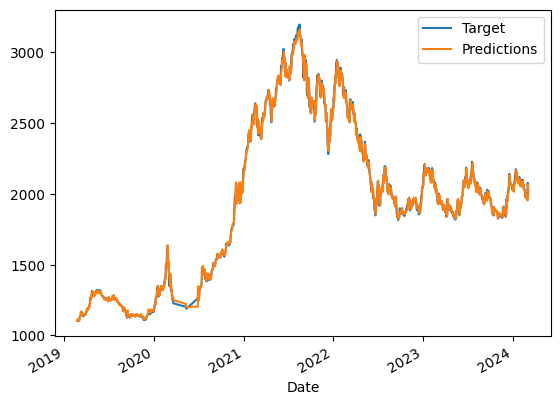

In [31]:
preds.plot()

### Without Backtesting

In [32]:
X_train = merged_data_scaled[predictors][:1400]
y_train = merged_data_scaled['Target'][:1400]
X_test = merged_data_scaled[predictors][1400:]
y_test = merged_data_scaled['Target'][1400:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 17), (343, 17), (1400,), (343,))

In [33]:
model1.fit(X_train,y_train)

LinearRegression()

In [34]:
preds_no_back_testing = model1.predict(X_test)
y_test = y_test[y_test.isnull() == False]

In [35]:
mse = mean_squared_error(y_test, preds_no_back_testing)
mse

0.00014869073733163074

In [36]:
preds_no_back_testing = pd.Series(preds_no_back_testing , index = X_test.index, name = 'Predictions')
result = pd.concat([y_test, preds_no_back_testing ], axis = 1)
result.head()

,Target,Predictions
Date,,
2022-09-01,0.414696,0.415834
2022-09-02,0.417880,0.412804
2022-09-04,0.415835,0.416011
2022-09-05,0.405744,0.412864
2022-09-06,0.400044,0.403309


<Axes: xlabel='Date'>

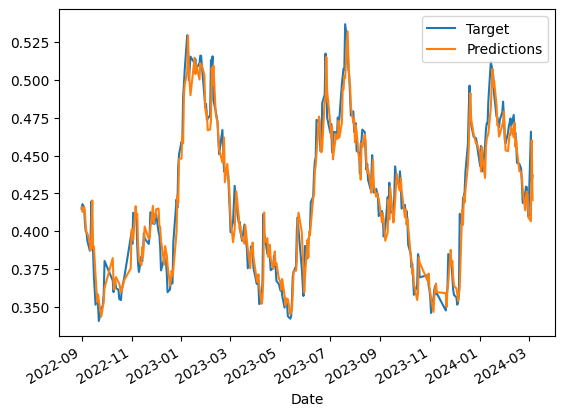

In [37]:
result.plot()

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(n_estimators = 200, min_samples_split = 50, random_state = 47)

In [39]:
preds_rf = backtest( merged_data_scaled,model_random_forest, predictors)
preds_rf = preds_rf.dropna()

In [40]:
mse_1 = mean_squared_error(preds_rf['Target'], preds_rf['Predictions'])
mse_1

0.02198063846015035

<Axes: xlabel='Date'>

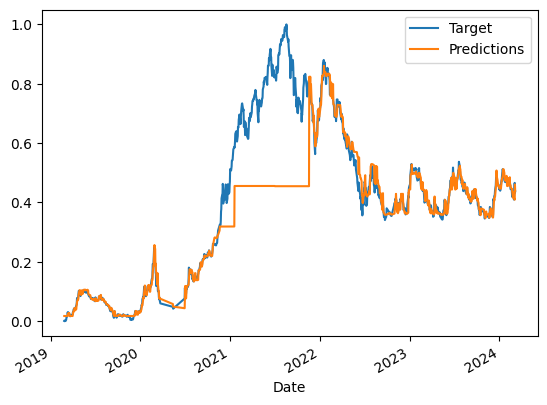

In [41]:
preds_rf.plot()

## LSTM

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

### Prepare the data for LSTM

In [43]:
def create_sequences(data, window_size=5):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        sequences.append(data.iloc[i:i + window_size, :-1].values)  # Exclude last column (Target) for X
        targets.append(data.iloc[i + window_size, -1])  # Last column (Target) for y
    return np.array(sequences), np.array(targets)
    

In [44]:
window_size = 5
lstm_data_scaled = feature_scaler.fit_transform(merged_data_1[predictors])
target_scaled = target_scaler.fit_transform(merged_data_1[['Target']])
lstm_data = np.concatenate((lstm_data_scaled, target_scaled), axis=1)

In [45]:
X, y = create_sequences(pd.DataFrame(lstm_data, columns = predictors + ['Target']), window_size)

In [46]:
train_size = int(0.7 * len(X))
val_size = int(0.1 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1216, 5, 17), (1216,), (173, 5, 17), (173,), (349, 5, 17), (349,))

In [47]:
model = Sequential()
model.add(Input(shape = (window_size, X_train.shape[2])))
model.add(LSTM(30))
model.add(Dense(1, activation = "linear"))

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30)             │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,791 (22.62 KB)

 Trainable params: 5,791 (22.62 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = MeanSquaredError(), metrics = [RootMeanSquaredError()])

In [50]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7239 - root_mean_squared_error: 0.7562 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0012 - root_mean_squared_error: 0.0339 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0538
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 5.4612e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 5.5349e-04 - root_mean_squared_error: 0.0234 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 4.9159e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 4.3140e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 

In [51]:
# Make predictions
predictions_scaled = model.predict(X_test)
predictions_scaled


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.45923504],
       [0.435706  ],
       [0.4381941 ],
       [0.44027287],
       [0.43613905],
       [0.43933567],
       [0.44054627],
       [0.41208056],
       [0.41245854],
       [0.41160926],
       [0.39352134],
       [0.37782228],
       [0.35255533],
       [0.36310685],
       [0.37339604],
       [0.35846424],
       [0.3610937 ],
       [0.38833645],
       [0.36730403],
       [0.35344747],
       [0.3573765 ],
       [0.32954925],
       [0.3154392 ],
       [0.3165353 ],
       [0.30915853],
       [0.3009469 ],
       [0.30648926],
       [0.32135114],
       [0.317625  ],
       [0.32295233],
       [0.31413925],
       [0.33917698],
       [0.33492345],
       [0.33247626],
       [0.34053117],
       [0.3406584 ],
       [0.33195892],
       [0.35664555],
       [0.3496103 ],
       [0.3828839 ],
       [0.39692494],
       [0.402878  ],
       [0.4171963 ],
       [0.42453668],
       [0.4206051 ],
       [0.4237862 ],
       [0.40716064],
       [0.376

In [52]:
preds = pd.DataFrame({
    'Target': y_test,
    'Predictions': predictions_scaled.flatten()
})

preds[['Target', 'Predictions']] = target_scaler.inverse_transform(preds[['Target', 'Predictions']])
preds

,Target,Predictions
0,2022.62,2064.064304
1,1989.26,2014.699880
2,1993.02,2019.919977
3,1995.34,2024.281282
4,1973.38,2015.608444
...,...,...
344,1972.09,1935.309660
345,1960.30,1926.644325
346,2078.00,1925.083867
347,2007.69,1855.940885


In [53]:
rmse = sqrt(mean_squared_error(preds['Target'], preds['Predictions']))
rmse

78.99838727736359

<Axes: >

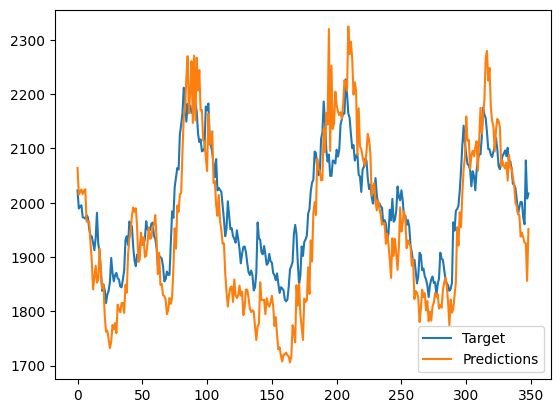

In [54]:
preds.plot()